In [1]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [14]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project, Statistics

In [3]:
data = Matrix(CSV.read("data/sst_data/sst_34_anomaly_embedded.txt", DataFrame; delim=',', ignorerepeated=true, header=false));

In [5]:
spectral_radii = [0.8, 0.9, 1.0]
sparsities = [0.05, 0.08,0.1, 0.12, 0.14, 0.2]
input_scales = [0.1, 0.5, 1.0, 2.0]
ridge_values = [0.0, 1e-6, 1e-5]
reservoir_sizes = [90, 110, 120, 125, 130, 135, 140, 150, 160, 180, 190, 200, 210]
param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

In [6]:
data_train = data[1:395,:]'; # train data is kept fixed to 80%

5×395 adjoint(::Matrix{Float64}) with eltype Float64:
  0.08  -0.2   -0.14   0.02   0.49  …  -0.03  -0.01   0.31   0.43   0.75
  0.27   0.86   1.24   1.73   1.68      0.51   0.75   0.44   0.82   0.83
  2.13   1.81   1.22   0.68   0.68      1.26   1.65   1.79   2.21   2.72
 -0.33  -0.44  -0.38  -1.02  -1.29      2.47   2.23   1.61   0.98   0.27
 -0.96  -0.16  -0.52  -0.54  -0.69     -0.42  -0.49  -0.43  -0.7   -0.64

In [5]:
# sample size N
N = 20

# lead time L
L = 30

# store predictions
predictions = zeros(N,L)

# store test data 
datasets_test = zeros(N,L);

In [ ]:
"""
for n in 1:N
    println("n=$n")
    val_data = data[396:395+n+48 , :]' # start validation set of length 48+n
    test_data = data[395+n+49:395+n+48+L,:]' # test against L month forecast lead
    datasets_test[n,:] = test_data[1,:]
    esn, W_out, val_loss = enso_project.cross_validate_esn(data_train, val_data, param_grid) 
    prediction = enso_project.esn_eval_pred(esn, W_out, test_data)
    sse_vals[n,:] .= sse(prediction, test_data[1,:])
    predictions[n,:] = prediction
end
"""

n=1
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 165.89071796388623
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 125.74689246733459
enso_project.ESNHyperparams(110, 0.9, 0.05, 0.1, 0.0)
Validation loss = 102.28493453843394
enso_project.ESNHyperparams(180, 0.9, 0.05, 0.1, 0.0)
Validation loss = 81.93028582436975
enso_project.ESNHyperparams(90, 1.0, 0.1, 0.1, 0.0)
Validation loss = 74.17290271260012
enso_project.ESNHyperparams(90, 0.9, 0.12, 0.1, 0.0)
Validation loss = 54.501160344104136
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 0.0)
Validation loss = 30.50979942909385
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 1.0e-6)
Validation loss = 30.49596650913812
enso_project.ESNHyperparams(130, 0.9, 0.14, 0.1, 1.0e-5)
Validation loss = 30.42386160998865
n=2
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 171.4474097332627
enso_project.ESNHyperparams(150, 0.8, 0.05, 0.1, 0.0)
Validation loss = 128.41675444018

In [ ]:
"""
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/error_saves/enso_L$(L)_N$(N)_predictions.csv", DataFrame(predictions, :auto))
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/error_saves/enso_L$(L)_N$(N)_testsets.csv", DataFrame(datasets_test, :auto))
"""

"C:/Users/lisah/Documents/Repos/enso_project.jl/error_saves/esn_L30_N20_testsets.csv"

In [58]:
predictions = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/error_saves/enso_L$(L)_N$(N)_predictions.csv", DataFrame))
datasets_test = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/error_saves/enso_L$(L)_N$(N)_testsets.csv", DataFrame))

20×30 Matrix{Float64}:
  0.67   0.71   0.97   0.72   0.75  …  -0.87  -0.55  -0.57  -0.32  -0.04
  0.71   0.97   0.72   0.75   0.6      -0.55  -0.57  -0.32  -0.04  -0.19
  0.97   0.72   0.75   0.6    0.42     -0.57  -0.32  -0.04  -0.19  -0.28
  0.72   0.75   0.6    0.42   0.15     -0.32  -0.04  -0.19  -0.28  -0.27
  0.75   0.6    0.42   0.15  -0.01     -0.04  -0.19  -0.28  -0.27  -0.77
  0.6    0.42   0.15  -0.01   0.52  …  -0.19  -0.28  -0.27  -0.77  -0.85
  0.42   0.15  -0.01   0.52   0.46     -0.28  -0.27  -0.77  -0.85  -1.05
  0.15  -0.01   0.52   0.46   0.44     -0.27  -0.77  -0.85  -1.05  -0.83
 -0.01   0.52   0.46   0.44   0.52     -0.77  -0.85  -1.05  -0.83  -0.71
  0.52   0.46   0.44   0.52   0.35     -0.85  -1.05  -0.83  -0.71  -0.89
  0.46   0.44   0.52   0.35   0.46  …  -1.05  -0.83  -0.71  -0.89  -0.95
  0.44   0.52   0.35   0.46   0.41     -0.83  -0.71  -0.89  -0.95  -1.05
  0.52   0.35   0.46   0.41  -0.21     -0.71  -0.89  -0.95  -1.05  -0.68
  0.35   0.46   0.41  -0.21 

In [ ]:
"""
    function rmse(predictions::AbstractMatrix, test_data::AbstractMatrix)
       
compute the rmse between predicitons and test data for each lead time. Is considered good if smaller 1.4.

# Arguments:
    - `predicitons::AbstractMatrix`: predictions, NxL matrix. N is sample size per lead time, L is all lead times considered
    - `test_data::AbstractMatrix`: test data for each sample, NxL matrix.

# Returns:
    - `Vector`: RMSE for each lead time, vector of length L
"""
function rmse(predictions::AbstractMatrix, test_data::AbstractMatrix)
    N, L = size(predictions, 1), size(predictions,2)
    sse_vals = zeros(N,L)
    for n in 1:N
        sse_vals[n, :] = sum.((predictions[n,:] .- test_data[n,:]).^2)
    end
    rmse = sqrt.(sum(sse_vals, dims=1) ./N)
    return rmse[1,:]
end

rmse (generic function with 1 method)

In [ ]:
"""
    function pcc(predictions::AbstractMatrix, test_data::AbstractMatrix)

Compute the Pearson-Correlation-Coefficient between sample and test data for each lead time considered. I.e., PCC is computed between respective data columns.
Is considered good, if > 0.5.

# Arguments:
    - `predicitons::AbstractMatrix`:  predictions, NxL matrix. N is sample size per lead time, L is all lead times considered
    - `test_data::AbstractMatrix`: test data for each sample, NxL matrix.

# Returns:
    - `Vector`: PCC for each lead time, vector of length L
"""
function pcc(predictions::AbstractMatrix, test_data::AbstractMatrix)
    L = size(predictions, 2)
    return [cor(predictions[:,i], test_data[:,i]) for i in 1:L]
end

pcc (generic function with 1 method)

In [156]:
"""
    function hss(predictions::AbstractMatrix, test_data::AbstractMatrix)

Measures accuracy of predictions (wrt randomly generated forecast). ENSO predicted if abs(ONI)>0.5. Compute ratio out of TP,TN,FP,FN.
Is considered good if >0.5

# Arguments:
    - `predicitons::AbstractMatrix`:  predictions, NxL matrix. N is sample size per lead time, L is all lead times considered
    - `test_data::AbstractMatrix`: test data for each sample, NxL matrix.

# Returns:
    - `Vector`: HSS for each lead time, vector of length L
"""
function hss(predictions::AbstractMatrix, test_data::AbstractMatrix)
    N = 2
    events_pred = abs.(Int.(round.(predictions)))
    events_true = abs.(Int.(round.(test_data)))

    # compute TN
    TN_mat = events_pred + events_true
    TN = sum(TN_mat .== 0, dims=1)

    # compute FP,FN,TP
    compare = events_pred - events_true # matrix: 0 for TP, TN; 1 for FP, -1 for FN
    FP = sum(compare .== 1, dims=1)
    FN = sum(compare .==-1, dims=1)
    TP = sum(compare .==0, dims=1) .- TN

    # calculate formula
    CRF = ((TP .+ FN) .* (TP .+ FP) .+ (TN .+ FN) .* (TN .+ FP)) ./ N
    HSS = (TP .+ TN .- CRF) ./ (N .- CRF)
    return HSS[1,:]
end

hss

In [157]:
pcc_vals = pcc(predictions, datasets_test);
rmse_vals = rmse(predictions, datasets_test);
hss_vals = hss(predictions, datasets_test);

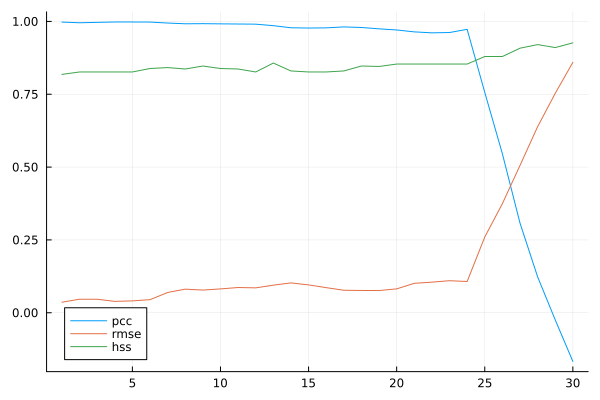

In [158]:
plot(pcc_vals, label="pcc")
plot!(rmse_vals, label="rmse")
plot!(hss_vals, label="hss")